<a href="https://colab.research.google.com/github/jmccahill5/datman/blob/main/PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set Up and copy PS2 merged data in


In [241]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler


from google.colab import files


import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


%matplotlib inline

#  ABSTRACT
#  These datasets include data from the US Census and Statista that measures the status of the housing market using measurements that I will describe in future notes
#  This data is useful because it allows us to look at trends with the data, and see whether two variables may correlate with each other



In [242]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/demand.csv

In [243]:
!pwd

!ls

/content
ex1.csv  sample_data


In [244]:
dat=pd.read_csv('ex1.csv')

In [245]:
#What each variable means
#INTDSRUSM193N	Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate)
#UMCSENT	University of Michigan: Consumer Sentiment
# GDP (gross domestic product)
#MORTGAGE15US	30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted)
#MSPUS	Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted)

In [246]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/supply.csv

In [247]:
!pwd

!ls

/content
ex1.csv  sample_data


In [248]:
dat2=pd.read_csv('ex1.csv')

In [249]:
dat2.head(10)

,DATE,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,1/1/2003,4.2,1806.333333,421328.6667,14908
1,1/4/2003,3.833333333,1837.666667,429308.6667,15244
2,1/7/2003,3.633333333,1937.333333,458890,15614
3,1/10/2003,3.966666667,1972.333333,491437.3333,15654
4,1/1/2004,3.7,1994.666667,506856.3333,15895
5,1/4/2004,3.9,2080,526483.3333,16079
6,1/7/2004,4.3,2069.666667,552939,15656
7,1/10/2004,4.1,2086,561413.3333,15361
8,1/1/2005,4.266666667,2105,590790.3333,15748
9,1/4/2005,4.266666667,2137.666667,611957,16061


In [250]:
## what each variable name stands for
#PERMIT	New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate)
#MSACSR	Monthly Supply of New Houses in the United States (Seasonally Adjusted)
#TLRESCONS	Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate)
#EVACANTUSQ176N	Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted)
#CSUSHPISA	S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted

In [251]:
#merge

In [252]:
merged1 = pd.merge(dat, dat2, how='outer', on=['DATE'],indicator=True)
merged1

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,_merge
0,1/1/2003,129.321000,5.840769,79.966667,2.250000,186000.0,11174.129,4.2,1806.333333,421328.6667,14908,both
1,1/4/2003,131.756000,5.506923,89.266667,2.166667,191800.0,11312.766,3.833333333,1837.666667,429308.6667,15244,both
2,1/7/2003,135.013000,6.033846,89.300000,2.000000,191900.0,11566.669,3.633333333,1937.333333,458890,15614,both
3,1/10/2003,138.835667,5.919286,91.966667,2.000000,198800.0,11772.234,3.966666667,1972.333333,491437.3333,15654,both
4,1/1/2004,143.298667,5.597500,98.000000,2.000000,212700.0,11923.447,3.7,1994.666667,506856.3333,15895,both
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1/4/2022,303.422667,5.266154,57.866667,NaN,449300.0,25248.476,8.7,1734.666667,947300.3333,15286,both
78,1/7/2022,301.726333,5.623077,56.100000,NaN,468000.0,25723.941,9.566666667,1610.666667,910346,15306,both
79,1/10/2022,297.896667,6.664615,58.800000,NaN,479500.0,26137.992,9.2,1455.333333,870620.6667,14554,both
80,1/1/2023,NaN,6.372308,64.633333,NaN,436800.0,26465.865,8.033333333,1424.333333,842559.6667,15053,both


In [253]:
#new vars
dat['RateCat'] = '''high rates'''
dat['RateCat'][0:7]

0    high rates
1    high rates
2    high rates
3    high rates
4    high rates
5    high rates
6    high rates
Name: RateCat, dtype: object

In [254]:
dat.loc[dat['MORTGAGE30US'] <5, 'RateCat']  = '''low rates'''

In [255]:
dat.groupby('RateCat').mean().round(0)

<ipython-input-255-df68cdc6d790>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dat.groupby('RateCat').mean().round(0)


,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
RateCat,,,,,,
high rates,176.0,6.0,79.0,3.0,256048.0,15030.0
low rates,183.0,4.0,84.0,1.0,296640.0,18705.0


# loading new data in and merging with original dataset on time

In [256]:
#3rd dataset shows S & P 500 statistics for each quarter in america- will merge with housing data
#link: https://datahub.io/core/s-and-p-500#data

In [257]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/dataaaa.csv

In [258]:
dat3=pd.read_csv('ex1.csv')

In [259]:
dat3.head(10)

,DATE,GDP,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1/1/2003,11174.129,895.84,16.12,28.50,181.7,4.05,1231.77,22.16,39.19,22.90
1,1/4/2003,11312.766,837.03,16.17,29.41,183.1,3.90,1142.11,22.06,40.13,21.21
2,1/7/2003,11566.669,846.63,16.22,30.32,184.2,3.81,1148.31,22.00,41.12,21.31
3,1/10/2003,11772.234,890.03,16.20,31.73,183.8,3.96,1209.80,22.02,43.13,22.43
4,1/1/2004,11923.447,935.96,16.19,33.14,183.5,3.57,1274.31,22.04,45.12,23.59
5,1/4/2004,12112.815,988.00,16.17,34.55,183.7,3.33,1343.70,21.99,46.99,24.83
6,1/7/2004,12305.307,992.54,16.31,35.89,183.9,3.98,1348.41,22.16,48.76,24.87
7,1/10/2004,12527.214,989.53,16.45,37.24,184.6,4.45,1339.22,22.26,50.40,24.64
8,1/1/2005,12767.286,1019.44,16.59,38.58,185.2,4.27,1375.23,22.38,52.04,25.24
9,1/4/2005,12922.656,1038.73,16.86,41.97,185.0,4.29,1402.77,22.76,56.67,25.68


In [260]:
## I am trying to merge with my merged dataset (merged1) but i am getting an error. I have it merged with only dat2 for now

In [261]:
merged2 = pd.merge(dat, dat3, on=['DATE'],indicator=True)
merged2

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP_x,RateCat,GDP_y,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10,_merge
0,1/1/2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129,high rates,11174.129,895.84,16.12,28.50,181.70,4.05,1231.77,22.16,39.19,22.90,both
1,1/4/2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766,high rates,11312.766,837.03,16.17,29.41,183.10,3.90,1142.11,22.06,40.13,21.21,both
2,1/7/2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669,high rates,11566.669,846.63,16.22,30.32,184.20,3.81,1148.31,22.00,41.12,21.31,both
3,1/10/2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234,high rates,11772.234,890.03,16.20,31.73,183.80,3.96,1209.80,22.02,43.13,22.43,both
4,1/1/2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447,high rates,11923.447,935.96,16.19,33.14,183.50,3.57,1274.31,22.04,45.12,23.59,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,1/1/2022,290.868000,3.822308,63.133333,NaN,433100,24740.480,low rates,25029.116,902.41,26.15,7.29,213.86,3.29,1054.23,30.55,8.52,16.00,both
77,1/4/2022,303.422667,5.266154,57.866667,NaN,449300,25248.476,high rates,25544.273,926.12,25.59,7.51,215.69,3.72,1072.72,29.64,8.70,16.38,both
78,1/7/2022,301.726333,5.623077,56.100000,NaN,468000,25723.941,high rates,25994.639,935.82,25.03,9.19,215.35,3.56,1085.67,29.03,10.66,16.69,both
79,1/10/2022,297.896667,6.664615,58.800000,NaN,479500,26137.992,high rates,26408.405,1009.73,24.46,10.86,215.83,3.59,1168.80,28.32,12.57,18.09,both


In [262]:
# There is more data included in the dat 3 dataset, so some data was not merged as expected. For example, data was collected for s&p
# that was not delinieted by a certain month or quarter. Also, some data was not collected for certain quarters in both datasets, which
# prevented this data from being merged

In [263]:
# this merge allows us to look at how the SP index compares to the CS index. You can see the comparision below

In [264]:
selected_data = mergedOuter2[['DATE','CSUSHPISA', 'SP500']]

In [265]:
selected_data.head(20)

,DATE,CSUSHPISA,SP500
0,1/1/2003,129.321000,895.84
1,1/4/2003,131.756000,837.03
2,1/7/2003,135.013000,846.63
3,1/10/2003,138.835667,890.03
4,1/1/2004,143.298667,935.96
5,1/4/2004,148.209000,988.00
6,1/7/2004,152.716667,992.54
7,1/10/2004,157.535333,989.53
8,1/1/2005,163.481333,1019.44
9,1/4/2005,169.347333,1038.73


In [266]:
## This shows the S & P index increases similarly as the case shiller index does, however the s & p is not adjusted for inflation while
## case shiller is. To look at this relationship, I can merge a new dataset that includes inflation adjustments

In [267]:
# This data is taken on a monthly basis rather than quarterly, so one every four variables will merge
#link: https://data.nasdaq.com/data/MULTPL/SP500_INFLADJ_MONTH-sp-500-inflation-adjusted-by-month

In [268]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/MULTPL-SP500_INFLADJ_MONTH.csv

In [269]:
dat4=pd.read_csv('ex1.csv')

In [270]:
dat4.head(10)

,Date,SP adj.
0,10/1/2023,4288.39
1,9/1/2023,4409.10
2,8/31/2023,4507.66
3,8/1/2023,4457.36
4,7/31/2023,4588.96
5,7/1/2023,4527.76
6,6/30/2023,4450.38
7,6/1/2023,4372.67
8,5/31/2023,4179.83
9,5/1/2023,4185.70


In [271]:
dat4.rename(columns={'Date': 'DATE'}, inplace=True)

In [272]:
dat4.head(10)

,DATE,SP adj.
0,10/1/2023,4288.39
1,9/1/2023,4409.10
2,8/31/2023,4507.66
3,8/1/2023,4457.36
4,7/31/2023,4588.96
5,7/1/2023,4527.76
6,6/30/2023,4450.38
7,6/1/2023,4372.67
8,5/31/2023,4179.83
9,5/1/2023,4185.70


In [273]:
dat4.dtypes

DATE        object
SP adj.    float64
dtype: object

In [274]:
dat.dtypes

DATE              object
CSUSHPISA        float64
MORTGAGE30US     float64
UMCSENT          float64
INTDSRUSM193N    float64
MSPUS              int64
GDP              float64
RateCat           object
dtype: object

In [275]:
mergedOuter3 = pd.merge(dat, dat4, how='outer', on=['DATE'],indicator=True)


In [276]:
mergedOuter3.head(10)

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,RateCat,SP adj.,_merge
0,1/1/2003,129.321000,5.840769,79.966667,2.250000,186000.0,11174.129,high rates,1513.74,both
1,1/4/2003,131.756000,5.506923,89.266667,2.166667,191800.0,11312.766,high rates,NaN,left_only
2,1/7/2003,135.013000,6.033846,89.300000,2.000000,191900.0,11566.669,high rates,NaN,left_only
3,1/10/2003,138.835667,5.919286,91.966667,2.000000,198800.0,11772.234,high rates,NaN,left_only
4,1/1/2004,143.298667,5.597500,98.000000,2.000000,212700.0,11923.447,high rates,1877.50,both
5,1/4/2004,148.209000,6.106154,93.333333,2.083333,217600.0,12112.815,high rates,NaN,left_only
6,1/7/2004,152.716667,5.894286,95.600000,2.500000,213500.0,12305.307,high rates,NaN,left_only
7,1/10/2004,157.535333,5.736154,93.866667,3.000000,228800.0,12527.214,high rates,NaN,left_only
8,1/1/2005,163.481333,5.768462,94.066667,3.500000,232500.0,12767.286,high rates,1902.06,both
9,1/4/2005,169.347333,5.708462,90.200000,4.000000,233700.0,12922.656,high rates,NaN,left_only


In [277]:
## I tried recoding the monthly variables to show just the quarterly, but was getting an error when merging. Also still cannot merge merged

In [278]:
selected_data2 = mergedOuter3[['DATE','CSUSHPISA', 'SP adj.']]

In [279]:
selected_data2

,DATE,CSUSHPISA,SP adj.
0,1/1/2003,129.321000,1513.74
1,1/4/2003,131.756000,NaN
2,1/7/2003,135.013000,NaN
3,1/10/2003,138.835667,NaN
4,1/1/2004,143.298667,1877.50
...,...,...,...
1924,1871-05-01,NaN,121.61
1925,1871-04-01,NaN,115.87
1926,1871-03-01,NaN,108.63
1927,1871-02-01,NaN,107.60


In [280]:
## I would like to make a graph to show this relationship if I can merge without NAN

# New Data merges based on geography

In [281]:
# Instead of Merging on Date, I will incorporate similar variables but merge on State with 2022 data

In [282]:
# Data link :https://www.bankrate.com/real-estate/median-home-price/#median-price-by-state

In [283]:
#this dataset incorporates only the MEDIAN home price for each state. I will merge it with economic data from each state
#data was collected in June 2023

!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/state%20data%20.csv

In [284]:
datST1=pd.read_csv('ex1.csv')

In [285]:
datST1.head(10)

,State,Price
0,Alabama,286000
1,Alaska,384000
2,Arizona,443000
3,Arkansas,259000
4,California,799000
5,Colorado,582000
6,Connecticut,432000
7,Delaware,335000
8,District of Columbia,606000
9,Florida,409000


In [286]:
#merging economic data for each state
#link: https://www.forbes.com/advisor/business/average-salary-by-state/

In [287]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/wage%20data.csv

In [288]:
datST2=pd.read_csv('ex1.csv')

In [289]:
datST2.head(10)

,State,Annual Average Wage,Average Hourly Wage
0,Alabama,50620,24.32
1,Alaska,66130,31.79
2,Arizona,58620,28.18
3,Arkansas,48570,23.35
4,California,73220,35.20
5,Colorado,67870,32.63
6,Connecticut,69310,33.32
7,Delaware,62260,29.93
8,Florida,55980,26.91
9,Georgia,58000,27.88


In [290]:
mergedSTATE = pd.merge(datST1, datST2, how='outer', on=['State'],indicator=True)

In [291]:
#this merged dataset looks at the average salary for each state, one being annual and one hourly
#the District of Columbia did not merge, since it was incorporated only in the first dataset

In [292]:
mergedSTATE

,State,Price,Annual Average Wage,Average Hourly Wage,_merge
0,Alabama,286000,50620.0,24.32,both
1,Alaska,384000,66130.0,31.79,both
2,Arizona,443000,58620.0,28.18,both
3,Arkansas,259000,48570.0,23.35,both
4,California,799000,73220.0,35.20,both
5,Colorado,582000,67870.0,32.63,both
6,Connecticut,432000,69310.0,33.32,both
7,Delaware,335000,62260.0,29.93,both
8,District of Columbia,606000,NaN,NaN,left_only
9,Florida,409000,55980.0,26.91,both


In [293]:
#you can see the median home prices vs the average wages in the graph below. In general, median prices are lower where incomes are lower

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Annual Average Wage')

Text(0.5, 1.0, 'Median Price vs. Annual Average Wage')

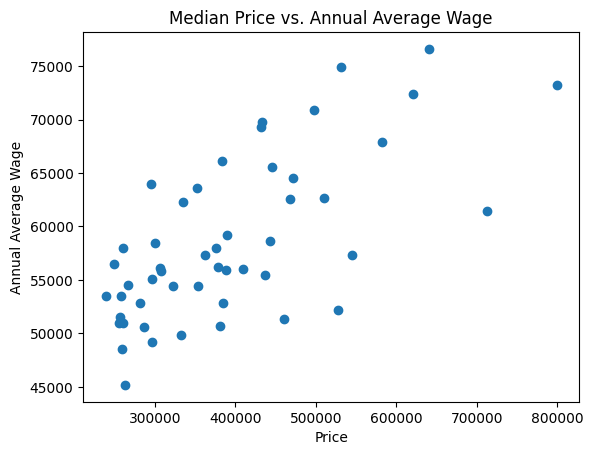

In [294]:
# Extract the two variables
x = mergedSTATE['Price']
y = mergedSTATE['Annual Average Wage']

# Create the scatterplot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Annual Average Wage')
plt.title('Median Price vs. Annual Average Wage')

# Show the plot
plt.show()

In [295]:
## These two dataset show the population and population density.
## links : https://wisevoter.com/state-rankings/population-density-by-state/#states-by-population-density
## https://www.statsamerica.org/sip/rank_list.aspx?rank_label=pop1

In [296]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/data%20pop.csv

In [297]:
datST4=pd.read_csv('ex1.csv')

In [298]:
datST4.head(10)

,Unnamed: 0,State,Population
0,1,California,39029342
1,2,Texas,30029572
2,3,Florida,22244823
3,4,New York,19677151
4,5,Pennsylvania,12972008
5,6,Illinois,12582032
6,7,Ohio,11756058
7,8,Georgia,10912876
8,9,North Carolina,10698973
9,10,Michigan,10034113


In [299]:
datST4.drop('Unnamed: 0', axis=1, inplace=True)

In [300]:
datST4.head(5)

,State,Population
0,California,39029342
1,Texas,30029572
2,Florida,22244823
3,New York,19677151
4,Pennsylvania,12972008


In [301]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/datapopdenn.csv

In [302]:
popden = pd.read_csv('ex1.csv')

print(popden)

             State  Pop. Den (per mi sq.)
0       New Jersey                1283.40
1     Rhode Island                1074.30
2    Massachusetts                 919.82
3      Connecticut                 746.70
4         Maryland                 648.84
5         Delaware                 522.09
6         New York                 433.90
7          Florida                 416.96
8     Pennsylvania                 292.62
9             Ohio                 290.70
10      California                 258.21
11          Hawaii                 231.01
12        Illinois                 230.68
13        Virginia                 223.36
14  North Carolina                 220.30
15         Indiana                 191.93
16         Georgia                 191.59
17        Michigan                 179.26
18  South Carolina                 175.19
19       Tennessee                 171.71
20   New Hampshire                 155.91
21      Washington                 120.37
22           Texas                

In [303]:
mergedSTATE2 = pd.merge(datST1, popden, how='outer', on=['State'],indicator=True)

In [304]:
# District of Columbia did not Merge. Also trying to get this to merge with previous data not just Price

In [305]:
mergedSTATE2

,State,Price,Pop. Den (per mi sq.),_merge
0,Alabama,286000,100.65,both
1,Alaska,384000,1.30,both
2,Arizona,443000,64.96,both
3,Arkansas,259000,58.43,both
4,California,799000,258.21,both
5,Colorado,582000,57.86,both
6,Connecticut,432000,746.70,both
7,Delaware,335000,522.09,both
8,District of Columbia,606000,NaN,left_only
9,Florida,409000,416.96,both


In [306]:
#This graph shows the population density for each state along with their median home price. There does not seem to be a strong correlation
#in any direction, but if anything, homes were slightly more expensive in densely populated states

Text(0.5, 0, 'Price')

Text(0, 0.5, 'Pop. Den (per mi sq.)')

Text(0.5, 1.0, 'Median Price vs. Pop. Den (per mi sq.)')

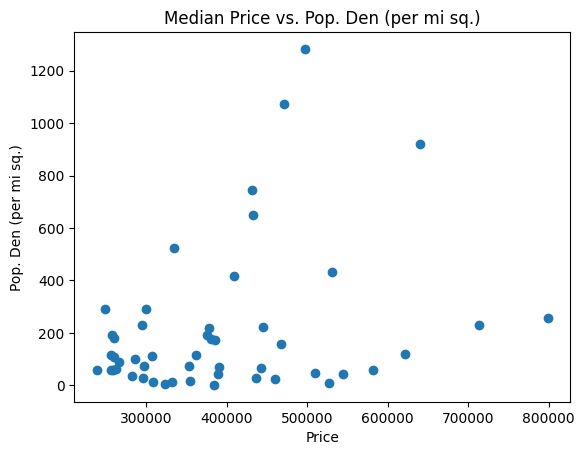

In [307]:
# Extract the two variables
x = mergedSTATE2['Price']
y = mergedSTATE2['Pop. Den (per mi sq.)']

# Create the scatterplot
plt.scatter(x, y)

# Add labels and a title
plt.xlabel('Price')
plt.ylabel('Pop. Den (per mi sq.)')
plt.title('Median Price vs. Pop. Den (per mi sq.)')

# Show the plot
plt.show()

In [308]:
# 5th dataset

In [309]:
!wget -q -O ex1.csv https://github.com/jmccahill5/datman/raw/main/political%20data.csv

In [310]:
politics = pd.read_csv('ex1.csv')

In [311]:
# R shows that state voted Republican in 2020, D fro Democrat

In [312]:
print(politics)

             State 2020 results
0          Alabama            R
1           Alaska            R
2          Arizona            D
3         Arkansas            R
4       California            D
5         Colorado            D
6      Connecticut            D
7         Delaware            D
8             D.C.            D
9          Florida            R
10         Georgia            D
11          Hawaii            D
12           Idaho            R
13        Illinois            D
14         Indiana            R
15            Iowa            R
16          Kansas            R
17        Kentucky            R
18       Louisiana            R
19           Maine            D
20        Maryland            D
21   Massachusetts            D
22        Michigan            D
23       Minnesota            D
24     Mississippi            R
25        Missouri            R
26         Montana            R
27        Nebraska            R
28          Nevada            D
29   New Hampshire            D
30      

In [313]:
mergedSTATE3 = pd.merge(datST1, politics, how='outer', on=['State'],indicator=True)

In [314]:
mergedSTATE3

,State,Price,2020 results,_merge
0,Alabama,286000.0,R,both
1,Alaska,384000.0,R,both
2,Arizona,443000.0,D,both
3,Arkansas,259000.0,R,both
4,California,799000.0,D,both
5,Colorado,582000.0,D,both
6,Connecticut,432000.0,D,both
7,Delaware,335000.0,D,both
8,District of Columbia,606000.0,NaN,left_only
9,Florida,409000.0,R,both


In [315]:
# Define the condition
condition = mergedSTATE3['2020 results'] == 'D'

# Filter the Dataset based on the condition
filtered_data = mergedSTATE3[condition]

# Calculate the average of the price for only D
average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 455280.0


In [316]:
# Same but for R
condition = mergedSTATE3['2020 results'] == 'R'

filtered_data = mergedSTATE3[condition]

average_value = filtered_data['Price'].mean()

print("Average Value for Category '2020 results':", average_value)

Average Value for Category '2020 results': 330520.0


In [317]:
## this comparision shows the average price of homes in states that voted democratic, and also states that voted Republican
## this shows that on average, states with higher home values voted democratic while states with lower land values voted republican
# Democratic average = $455,280
# Republican average = $330,520